In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [23]:
# Load the dataset
df = pd.read_csv("/content/diabetes_prediction_dataset.csv")

In [24]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [25]:
# Summary statistics
print("Summary statistics of the dataset:")
print(df.describe())

Summary statistics of the dataset:
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000 

In [26]:
# Descriptive statistics
print(df.describe())

                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           14

In [27]:
# Check for missing values
print("Missing values in the dataset:")
print(df.isnull().sum())

Missing values in the dataset:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


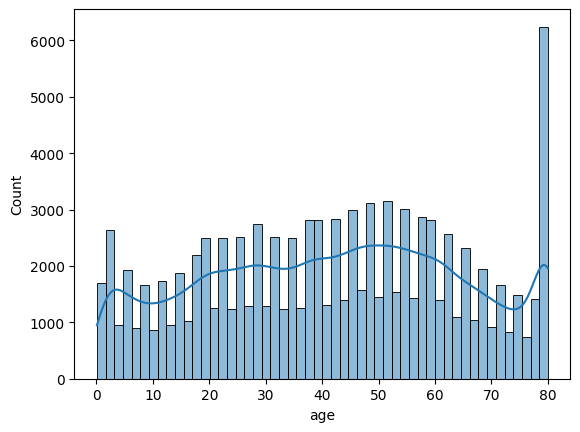

In [31]:
# Data visualization
sns.histplot(df['age'], kde=True)
plt.show()

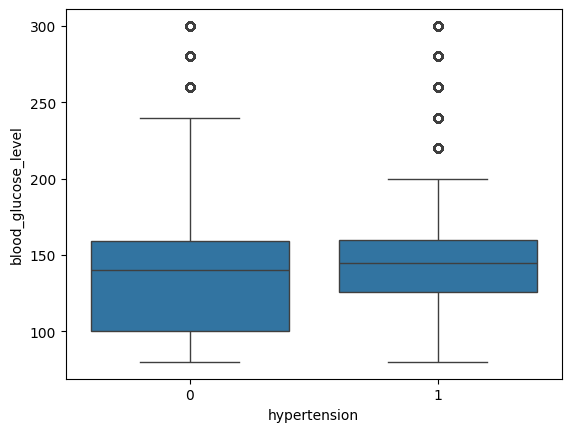

In [44]:
sns.boxplot(x='hypertension', y='blood_glucose_level', data=df)
plt.show()

<ipython-input-45-c373b3167f4b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


                          age  hypertension  heart_disease  smoking_history  \
age                  1.000000      0.251171       0.233354         0.228608   
hypertension         0.251171      1.000000       0.121262         0.093177   
heart_disease        0.233354      0.121262       1.000000         0.027598   
smoking_history      0.228608      0.093177       0.027598         1.000000   
bmi                  0.337396      0.147666       0.061198         0.179361   
HbA1c_level          0.101354      0.080939       0.067589         0.037369   
blood_glucose_level  0.110672      0.084429       0.070066         0.040219   
diabetes             0.258008      0.197823       0.171727         0.094290   

                          bmi  HbA1c_level  blood_glucose_level  diabetes  
age                  0.337396     0.101354             0.110672  0.258008  
hypertension         0.147666     0.080939             0.084429  0.197823  
heart_disease        0.061198     0.067589             0.070

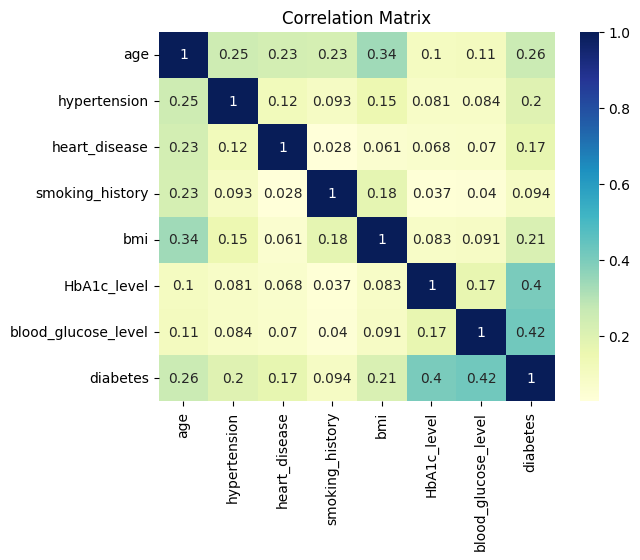

In [45]:
# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()

In [39]:
# Handle missing values
df.fillna(df.mean(), inplace=True)

<ipython-input-39-215a67fbbad9>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [40]:
# Define features and target variable
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Preprocess categorical variables (e.g., 'gender' column) using one-hot encoding
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), ['gender'])], remainder='passthrough')
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [47]:
# Initialize the random forest classifier
clf = RandomForestClassifier()

In [48]:
# Train the model
clf.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
# Make predictions
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9703
